In [1]:
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import numpy as np
import time
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
from astropy.io import fits
%matplotlib inline

In [2]:
db_path = '../../data/kpf_ts_aug_oct2024_v5.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path, base_dir= '/data/L2')

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /data/kpf_ts_aug_oct2024_v5.db
INFO: Base data directory: /data/L2
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1661 cols over 27 days in 20241001-20241027; updated 2025-04-03 04:48:16


In [3]:
def rank_array(arr):
    sorted_indices = {num: rank for rank, num in enumerate(sorted(arr), start=1)}
    return [sorted_indices[num] for num in arr]

# Etalon RV for the SCI1 Fiber Green Wavelengths

In [4]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (100, 135):
    unique_cols.add(f'RV{i}')
unique_cols.add('CCFW00')
unique_cols.add('CCFW01')
unique_cols.add('CCFW02')
unique_cols.add('CCFW03')
unique_cols.add('CCFW04')
unique_cols.add('CCFW05')
unique_cols.add('CCFW06')
unique_cols.add('CCFW07')
unique_cols.add('CCFW08')
unique_cols.add('CCFW09')
for i in range(10, 35):
    unique_cols.add(f'CCFW{i}')

In [5]:
sci_1_green_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_1_green_df = sci_1_green_df.drop(columns=['NOTJUNK'])
sci_1_green_df = sci_1_green_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_1_green_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_1_green_df.iloc[:, 2:] = sci_1_green_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_1_green_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_1_green_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_1_green_df = pd.concat([sci_1_green_df['DATE-MID'], sci_1_green_df['ObsID'],sci_1_green_df[rv_columns], sci_1_green_df[ccfw_columns]], axis=1)
sci_1_green_df['DATE-MID'] = pd.to_datetime(sci_1_green_df['DATE-MID'])
sci_1_green_df

,DATE-MID,ObsID,RV100,RV101,RV102,RV103,RV104,RV105,RV106,RV107,...,CCFW25,CCFW26,CCFW27,CCFW28,CCFW29,CCFW30,CCFW31,CCFW32,CCFW33,CCFW34
0,2024-10-01 01:31:52.415,KP.20241001.05482.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2024-10-01 01:33:40.948,KP.20241001.05590.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2024-10-01 01:35:29.660,KP.20241001.05699.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2024-10-01 02:52:11.874,KP.20241001.10301.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2024-10-01 02:54:00.323,KP.20241001.10410.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,2024-10-27 17:33:32.853,KP.20241027.63182.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2558,2024-10-27 17:35:21.291,KP.20241027.63291.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2559,2024-10-27 18:31:40.930,KP.20241027.66670.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2560,2024-10-27 18:33:29.617,KP.20241027.66779.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


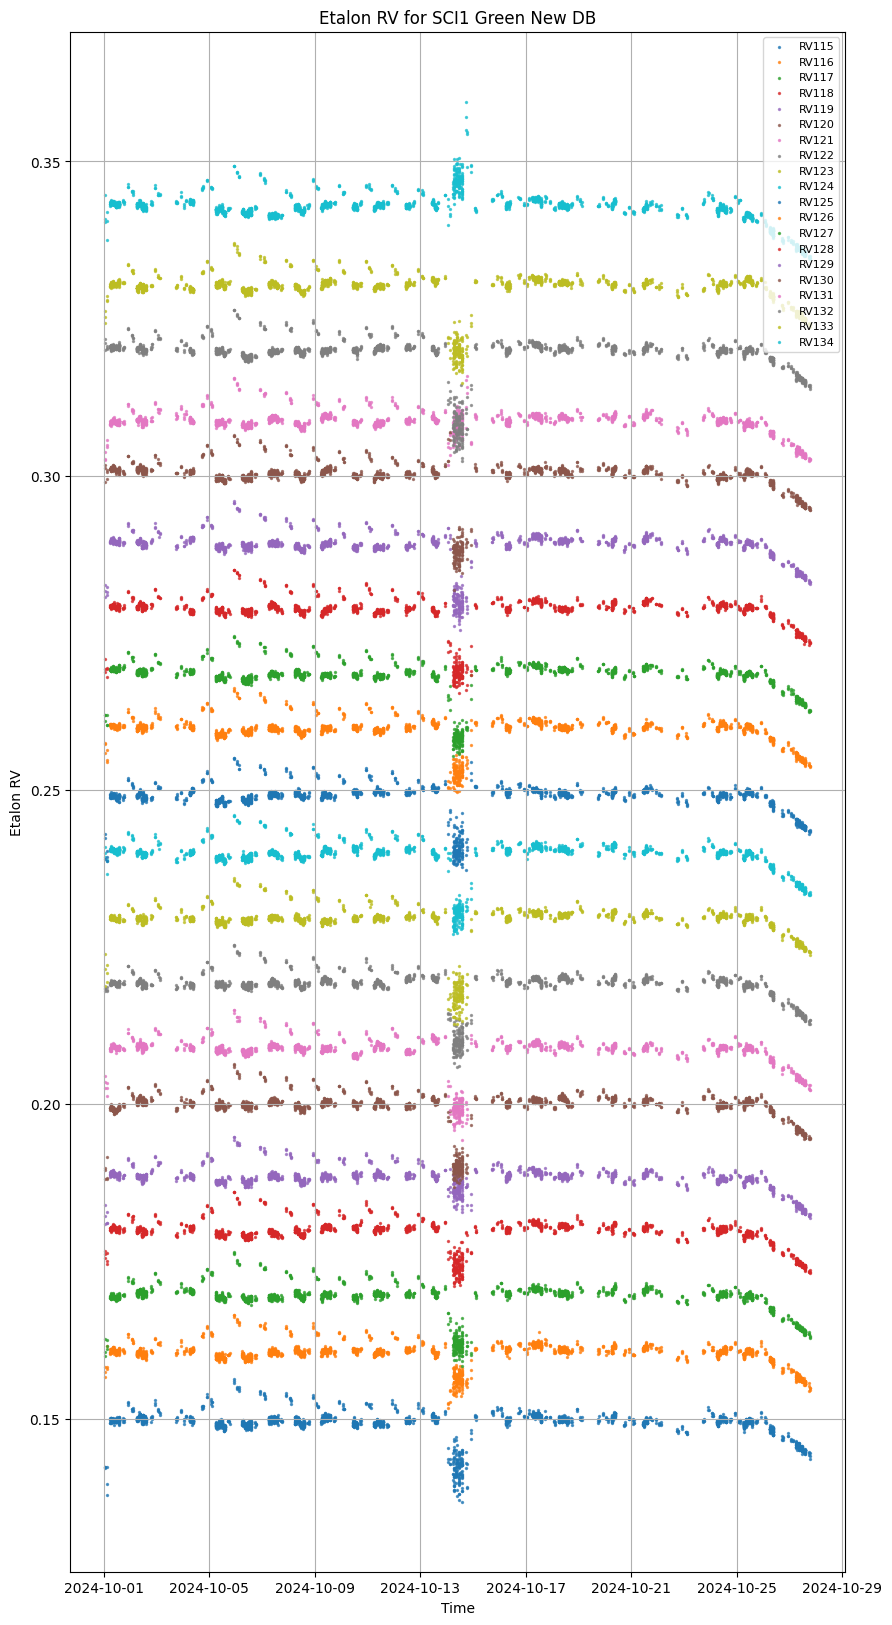

In [6]:
plt.figure(figsize=(10, 20)) 
for i in range(35):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_1_green_df[weight_col] != 0
    times = sci_1_green_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_1_green_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI1 Green New DB")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [7]:
rms_results = []
for i in range(35):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_1_green_df.loc[sci_1_green_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([i, rv_col, rms])

sci_1_green_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_1_green_overall_rms = np.min(sci_1_green_rms_df["RMS"])
sci_1_green_rms_df["RMS Factor"] = (sci_1_green_rms_df["RMS"] - sci_1_green_overall_rms)/sci_1_green_overall_rms + 1
sci_1_green_rms_df["RMS Rank"] = rank_array(sci_1_green_rms_df["RMS"] - sci_1_green_overall_rms)
sci_1_green_rms_df

,Order,RV Col,RMS,RMS Factor,RMS Rank
0,15,RV115,0.002360,1.379687,5
1,16,RV116,0.001711,1.000000,1
2,17,RV117,0.002509,1.466755,7
3,18,RV118,0.002060,1.204093,2
4,19,RV119,0.002420,1.414525,6
5,20,RV120,0.002639,1.542531,8
6,21,RV121,0.003112,1.819084,16
7,22,RV122,0.002797,1.634851,12
8,23,RV123,0.003248,1.898581,18
9,24,RV124,0.002729,1.595291,10


In [8]:
sci_1_green_max_order = sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmax(), "Order"]
sci_1_green_min_order = sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_1_green_max_order}')
print(f'Min: {sci_1_green_min_order}')

Max: 34
Min: 16


# Etalon RV for the SCI1 Fiber Red Wavelengths

In [9]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (135, 167):
    unique_cols.add(f'RV{i}')
for i in range(35, 67):
    unique_cols.add(f'CCFW{i}')

In [10]:
sci_1_red_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_1_red_df = sci_1_red_df.drop(columns=['NOTJUNK'])
sci_1_red_df = sci_1_red_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_1_red_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_1_red_df.iloc[:, 2:] = sci_1_red_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_1_red_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_1_red_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_1_red_df = pd.concat([sci_1_red_df['DATE-MID'], sci_1_red_df['ObsID'],sci_1_red_df[rv_columns], sci_1_red_df[ccfw_columns]], axis=1)
sci_1_red_df['DATE-MID'] = pd.to_datetime(sci_1_red_df['DATE-MID'])
sci_1_red_df

,DATE-MID,ObsID,RV135,RV136,RV137,RV138,RV139,RV140,RV141,RV142,...,CCFW57,CCFW58,CCFW59,CCFW60,CCFW61,CCFW62,CCFW63,CCFW64,CCFW65,CCFW66
0,2024-10-01 01:31:52.415,KP.20241001.05482.41,0.0,0.001208,0.000315,0.006141,0.005634,0.005715,0.008102,0.006587,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2024-10-01 01:33:40.948,KP.20241001.05590.94,0.0,0.005582,-0.002768,0.00947,0.006172,0.007354,0.010711,0.006385,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2024-10-01 01:35:29.660,KP.20241001.05699.65,0.0,0.004073,0.006352,0.006427,0.006923,0.005996,0.009137,0.004869,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2024-10-01 02:52:11.874,KP.20241001.10301.86,0.0,0.003948,0.003414,0.006698,0.006132,0.007189,0.003516,0.006886,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2024-10-01 02:54:00.323,KP.20241001.10410.31,0.0,0.00429,-0.000799,0.005239,0.00605,0.005144,0.004634,0.008599,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,2024-10-27 17:33:32.853,KP.20241027.63182.84,0.0,-0.001006,-0.000403,0.0002,-0.00096,0.001376,0.00041,-0.000505,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2558,2024-10-27 17:35:21.291,KP.20241027.63291.25,0.0,-0.001504,-0.001017,0.000614,-0.000566,0.001042,0.000279,-0.000145,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2559,2024-10-27 18:31:40.930,KP.20241027.66670.90,0.0,-0.001725,-0.001329,0.000684,-0.001009,0.00044,0.000215,-0.000174,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2560,2024-10-27 18:33:29.617,KP.20241027.66779.59,0.0,-0.00188,-0.001187,0.000688,-0.001095,0.000921,0.000012,-0.0001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


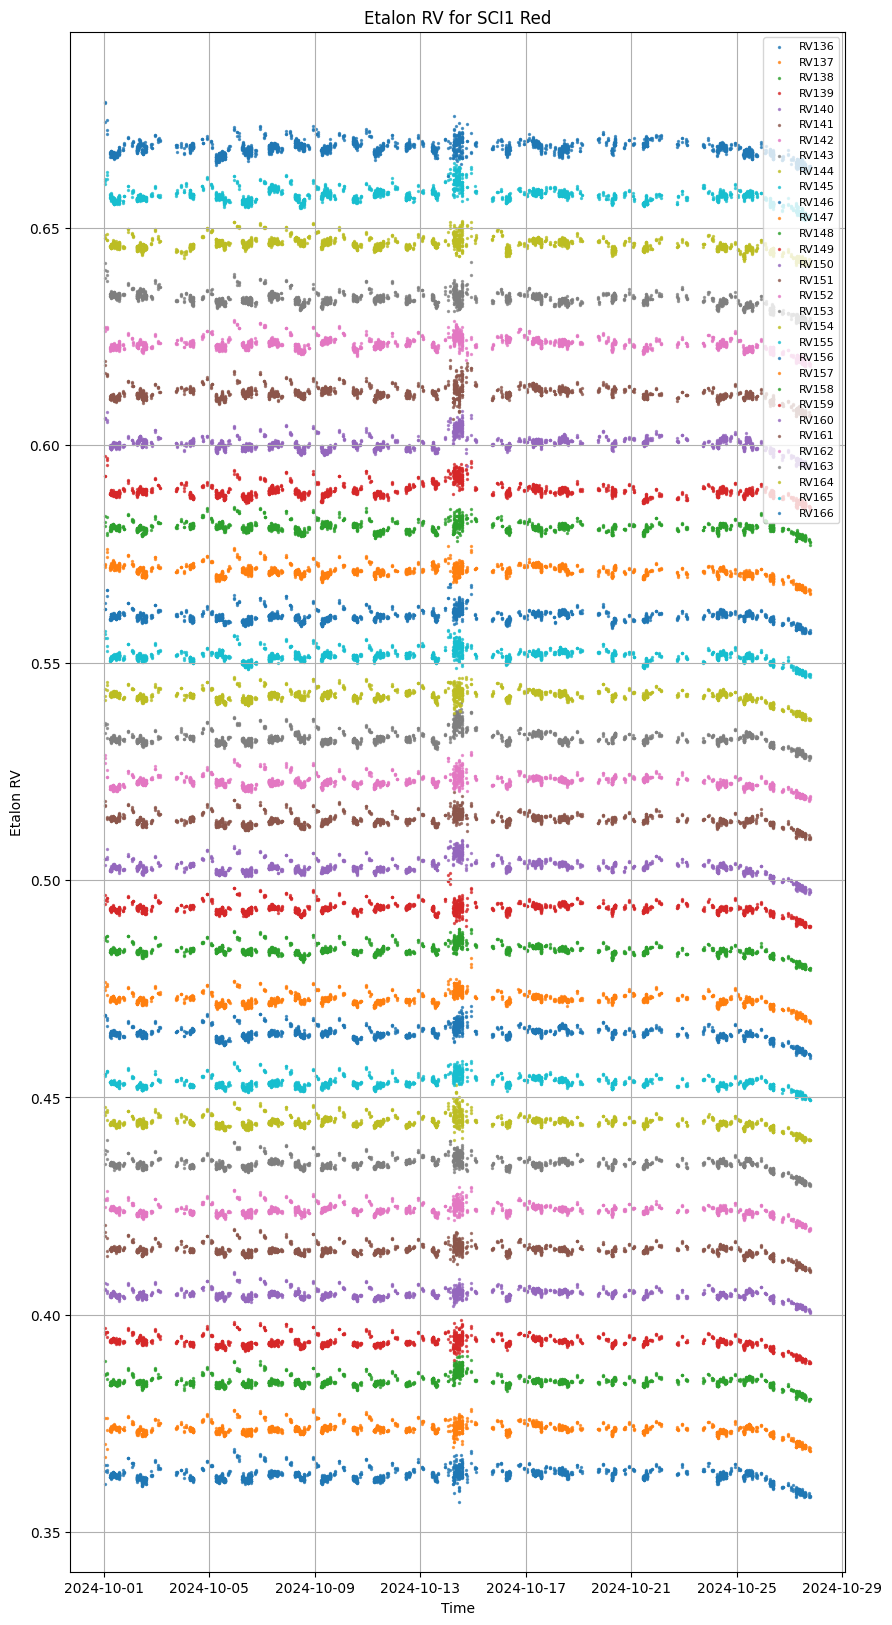

In [11]:
plt.figure(figsize=(10, 20)) 
for i in range(35, 67):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_1_red_df[weight_col] != 0
    times = sci_1_red_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_1_red_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI1 Red")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [12]:
rms_results = []
order = 0
for i in range(35, 67):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_1_red_df.loc[sci_1_red_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([order, rv_col, rms])
    order+=1

sci_1_red_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_1_red_overall_rms = np.min(sci_1_red_rms_df["RMS"])
sci_1_red_rms_df["RMS Factor"] = (sci_1_red_rms_df["RMS"] - sci_1_red_overall_rms)/sci_1_red_overall_rms + 1
sci_1_red_rms_df["RMS Rank"] = rank_array(sci_1_red_rms_df["RMS"] - sci_1_red_overall_rms)
sci_1_red_rms_df

,Order,RV Col,RMS,RMS Factor,RMS Rank
0,1,RV136,0.003278,2.362009,13
1,2,RV137,0.003802,2.739380,19
2,3,RV138,0.004705,3.390477,24
3,4,RV139,0.003764,2.712176,18
4,5,RV140,0.004715,3.397577,25
5,6,RV141,0.004859,3.501652,28
6,7,RV142,0.004101,2.954807,22
7,8,RV143,0.004786,3.448819,26
8,9,RV144,0.004354,3.137583,23
9,10,RV145,0.003473,2.502801,15


In [13]:
sci_1_red_max_order = sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmax(), "Order"]
sci_1_red_min_order = sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_1_red_max_order}')
print(f'Min: {sci_1_red_min_order}')

Max: 31
Min: 21


# Etalon RV for the SCI2 Fiber Green Wavelength

In [14]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (200, 235):
    unique_cols.add(f'RV{i}')
unique_cols.add('CCFW00')
unique_cols.add('CCFW01')
unique_cols.add('CCFW02')
unique_cols.add('CCFW03')
unique_cols.add('CCFW04')
unique_cols.add('CCFW05')
unique_cols.add('CCFW06')
unique_cols.add('CCFW07')
unique_cols.add('CCFW08')
unique_cols.add('CCFW09')
for i in range(10, 35):
    unique_cols.add(f'CCFW{i}')

In [15]:
sci_2_green_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_2_green_df = sci_2_green_df.drop(columns=['NOTJUNK'])
sci_2_green_df = sci_2_green_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_2_green_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_2_green_df.iloc[:, 2:] = sci_2_green_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_2_green_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_2_green_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_2_green_df = pd.concat([sci_2_green_df['DATE-MID'], sci_2_green_df['ObsID'],sci_2_green_df[rv_columns], sci_2_green_df[ccfw_columns]], axis=1)
sci_2_green_df['DATE-MID'] = pd.to_datetime(sci_2_green_df['DATE-MID'])
sci_2_green_df

,DATE-MID,ObsID,RV200,RV201,RV202,RV203,RV204,RV205,RV206,RV207,...,CCFW25,CCFW26,CCFW27,CCFW28,CCFW29,CCFW30,CCFW31,CCFW32,CCFW33,CCFW34
0,2024-10-01 01:31:52.415,KP.20241001.05482.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2024-10-01 01:33:40.948,KP.20241001.05590.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2024-10-01 01:35:29.660,KP.20241001.05699.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2024-10-01 02:52:11.874,KP.20241001.10301.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2024-10-01 02:54:00.323,KP.20241001.10410.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,2024-10-27 17:33:32.853,KP.20241027.63182.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2558,2024-10-27 17:35:21.291,KP.20241027.63291.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2559,2024-10-27 18:31:40.930,KP.20241027.66670.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2560,2024-10-27 18:33:29.617,KP.20241027.66779.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


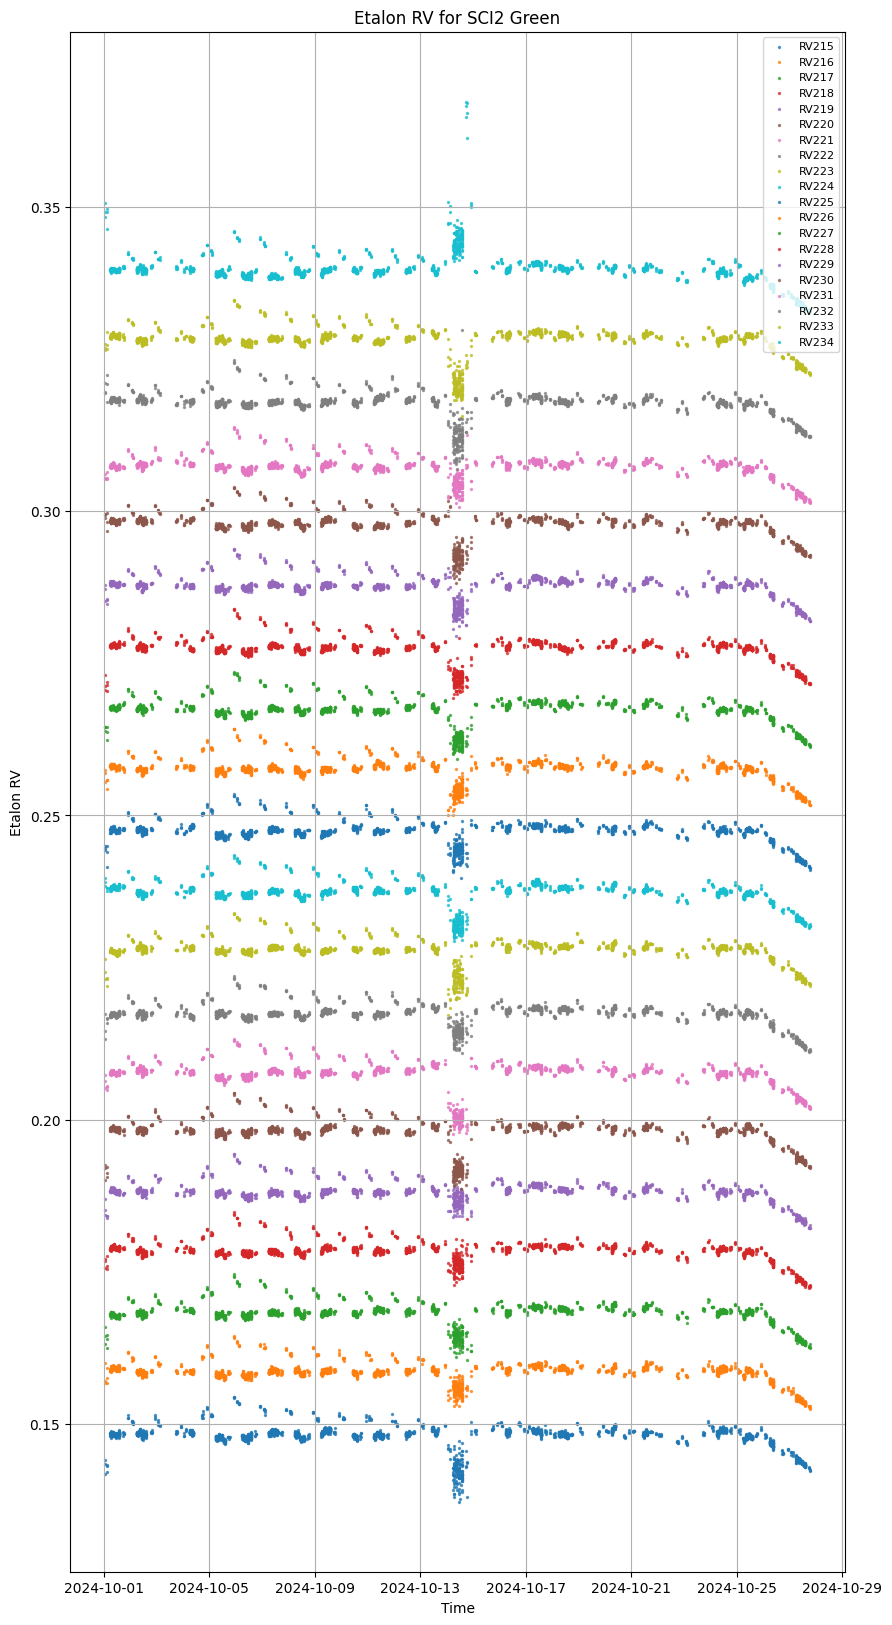

In [16]:
plt.figure(figsize=(10, 20)) 
for i in range(35):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_2_green_df[weight_col] != 0
    times = sci_2_green_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_2_green_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI2 Green")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [17]:
rms_results = []
for i in range(35):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_2_green_df.loc[sci_2_green_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([i, rv_col, rms])

sci_2_green_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_2_green_overall_rms = np.min(sci_2_green_rms_df["RMS"])
sci_2_green_rms_df["RMS Factor"] = (sci_2_green_rms_df["RMS"] - sci_2_green_overall_rms)/sci_2_green_overall_rms + 1
sci_2_green_rms_df["RMS Rank"] = rank_array(sci_2_green_rms_df["RMS"] - sci_2_green_overall_rms)
sci_2_green_rms_df

,Order,RV Col,RMS,RMS Factor,RMS Rank
0,15,RV215,0.002887,1.277407,6
1,16,RV216,0.002260,1.000000,1
2,17,RV217,0.002593,1.147308,5
3,18,RV218,0.002317,1.025355,2
4,19,RV219,0.002515,1.112945,4
5,20,RV220,0.002992,1.323994,11
6,21,RV221,0.003454,1.528524,20
7,22,RV222,0.003251,1.438533,15
8,23,RV223,0.002970,1.314282,9
9,24,RV224,0.003441,1.522615,19


In [18]:
sci_2_green_max_order = sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmax(), "Order"]
sci_2_green_min_order = sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_2_green_max_order}')
print(f'Min: {sci_2_green_min_order}')

Max: 21
Min: 16


# Etalon RV for the SCI2 Fiber Red Wavelength

In [19]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (235, 267):
    unique_cols.add(f'RV{i}')
for i in range(35, 67):
    unique_cols.add(f'CCFW{i}')

In [20]:
sci_2_red_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_2_red_df = sci_2_red_df.drop(columns=['NOTJUNK'])
sci_2_red_df = sci_2_red_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_2_red_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_2_red_df.iloc[:, 2:] = sci_2_red_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_2_red_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_2_red_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_2_red_df = pd.concat([sci_2_red_df['DATE-MID'], sci_2_red_df['ObsID'],sci_2_red_df[rv_columns], sci_2_red_df[ccfw_columns]], axis=1)
sci_2_red_df['DATE-MID'] = pd.to_datetime(sci_2_red_df['DATE-MID'])
sci_2_red_df

,DATE-MID,ObsID,RV235,RV236,RV237,RV238,RV239,RV240,RV241,RV242,...,CCFW57,CCFW58,CCFW59,CCFW60,CCFW61,CCFW62,CCFW63,CCFW64,CCFW65,CCFW66
0,2024-10-01 01:31:52.415,KP.20241001.05482.41,0.0,-0.002653,0.001318,-0.000063,-0.000053,0.001733,0.001712,-0.001286,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2024-10-01 01:33:40.948,KP.20241001.05590.94,0.0,-0.002059,0.000441,0.001499,-0.00008,0.000462,0.003056,0.000654,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2024-10-01 01:35:29.660,KP.20241001.05699.65,0.0,-0.001392,-0.001705,-0.001235,0.000278,-0.00091,0.001029,-0.00257,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2024-10-01 02:52:11.874,KP.20241001.10301.86,0.0,-0.003348,-0.003827,-0.003269,-0.000289,0.000162,-0.004156,-0.00126,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2024-10-01 02:54:00.323,KP.20241001.10410.31,0.0,0.000737,0.001669,-0.001933,-0.000637,0.002183,-0.001376,-0.001408,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,2024-10-27 17:33:32.853,KP.20241027.63182.84,0.0,-0.005322,-0.006333,-0.005834,-0.005767,-0.005157,-0.005863,-0.005896,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2558,2024-10-27 17:35:21.291,KP.20241027.63291.25,0.0,-0.005763,-0.00606,-0.005678,-0.005143,-0.005141,-0.00594,-0.005515,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2559,2024-10-27 18:31:40.930,KP.20241027.66670.90,0.0,-0.005686,-0.006394,-0.005807,-0.005413,-0.005196,-0.005871,-0.005608,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2560,2024-10-27 18:33:29.617,KP.20241027.66779.59,0.0,-0.005459,-0.006406,-0.006024,-0.005248,-0.005487,-0.005905,-0.005643,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


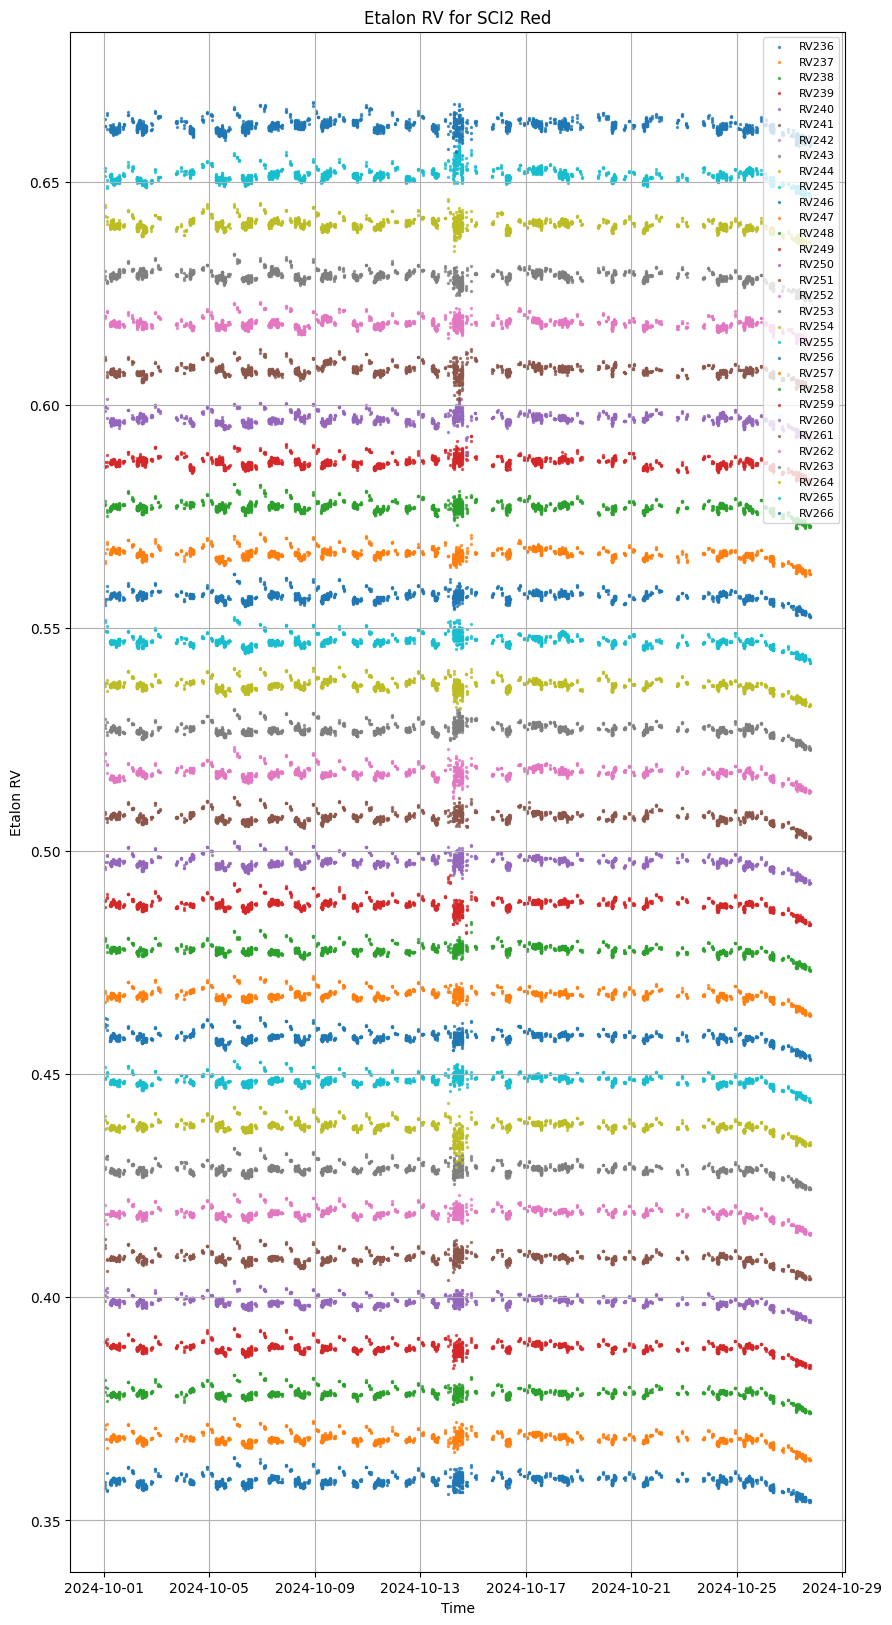

In [21]:
plt.figure(figsize=(10, 20)) 
for i in range(35, 67):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_2_red_df[weight_col] != 0
    times = sci_2_red_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_2_red_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI2 Red")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [22]:
rms_results = []
order = 0
for i in range(35, 67):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_2_red_df.loc[sci_2_red_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([order, rv_col, rms])
    order+=1

sci_2_red_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_2_red_overall_rms = np.min(sci_2_red_rms_df["RMS"])
sci_2_red_rms_df["RMS Factor"] = (sci_2_red_rms_df["RMS"] - sci_2_red_overall_rms)/sci_2_red_overall_rms + 1
sci_2_red_rms_df["RMS Rank"] = rank_array(sci_2_red_rms_df["RMS"] - sci_2_red_overall_rms)
sci_2_red_rms_df

,Order,RV Col,RMS,RMS Factor,RMS Rank
0,1,RV236,0.001849,1.392550,4
1,2,RV237,0.002267,1.706914,12
2,3,RV238,0.002019,1.520325,10
3,4,RV239,0.001884,1.418696,5
4,5,RV240,0.001672,1.259267,2
5,6,RV241,0.001946,1.465110,7
6,7,RV242,0.001828,1.376546,3
7,8,RV243,0.001920,1.445736,6
8,9,RV244,0.002364,1.780017,15
9,10,RV245,0.002051,1.544611,11


In [23]:
sci_2_red_max_order = sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmax(), "Order"]
sci_2_red_min_order = sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_2_red_max_order}')
print(f'Min: {sci_2_red_min_order}')

Max: 22
Min: 29


# Etalon RV for the SCI3 Fiber Green Wavelengths

In [24]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (300, 335):
    unique_cols.add(f'RV{i}')
unique_cols.add('CCFW00')
unique_cols.add('CCFW01')
unique_cols.add('CCFW02')
unique_cols.add('CCFW03')
unique_cols.add('CCFW04')
unique_cols.add('CCFW05')
unique_cols.add('CCFW06')
unique_cols.add('CCFW07')
unique_cols.add('CCFW08')
unique_cols.add('CCFW09')
for i in range(10, 35):
    unique_cols.add(f'CCFW{i}')

In [25]:
sci_3_green_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_3_green_df = sci_3_green_df.drop(columns=['NOTJUNK'])
sci_3_green_df = sci_3_green_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_3_green_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_3_green_df.iloc[:, 2:] = sci_3_green_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_3_green_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_3_green_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_3_green_df = pd.concat([sci_3_green_df['DATE-MID'], sci_3_green_df['ObsID'],sci_3_green_df[rv_columns], sci_3_green_df[ccfw_columns]], axis=1)
sci_3_green_df['DATE-MID'] = pd.to_datetime(sci_3_green_df['DATE-MID'])
sci_3_green_df

,DATE-MID,ObsID,RV300,RV301,RV302,RV303,RV304,RV305,RV306,RV307,...,CCFW25,CCFW26,CCFW27,CCFW28,CCFW29,CCFW30,CCFW31,CCFW32,CCFW33,CCFW34
0,2024-10-01 01:31:52.415,KP.20241001.05482.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2024-10-01 01:33:40.948,KP.20241001.05590.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2024-10-01 01:35:29.660,KP.20241001.05699.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2024-10-01 02:52:11.874,KP.20241001.10301.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2024-10-01 02:54:00.323,KP.20241001.10410.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,2024-10-27 17:33:32.853,KP.20241027.63182.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2558,2024-10-27 17:35:21.291,KP.20241027.63291.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2559,2024-10-27 18:31:40.930,KP.20241027.66670.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2560,2024-10-27 18:33:29.617,KP.20241027.66779.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


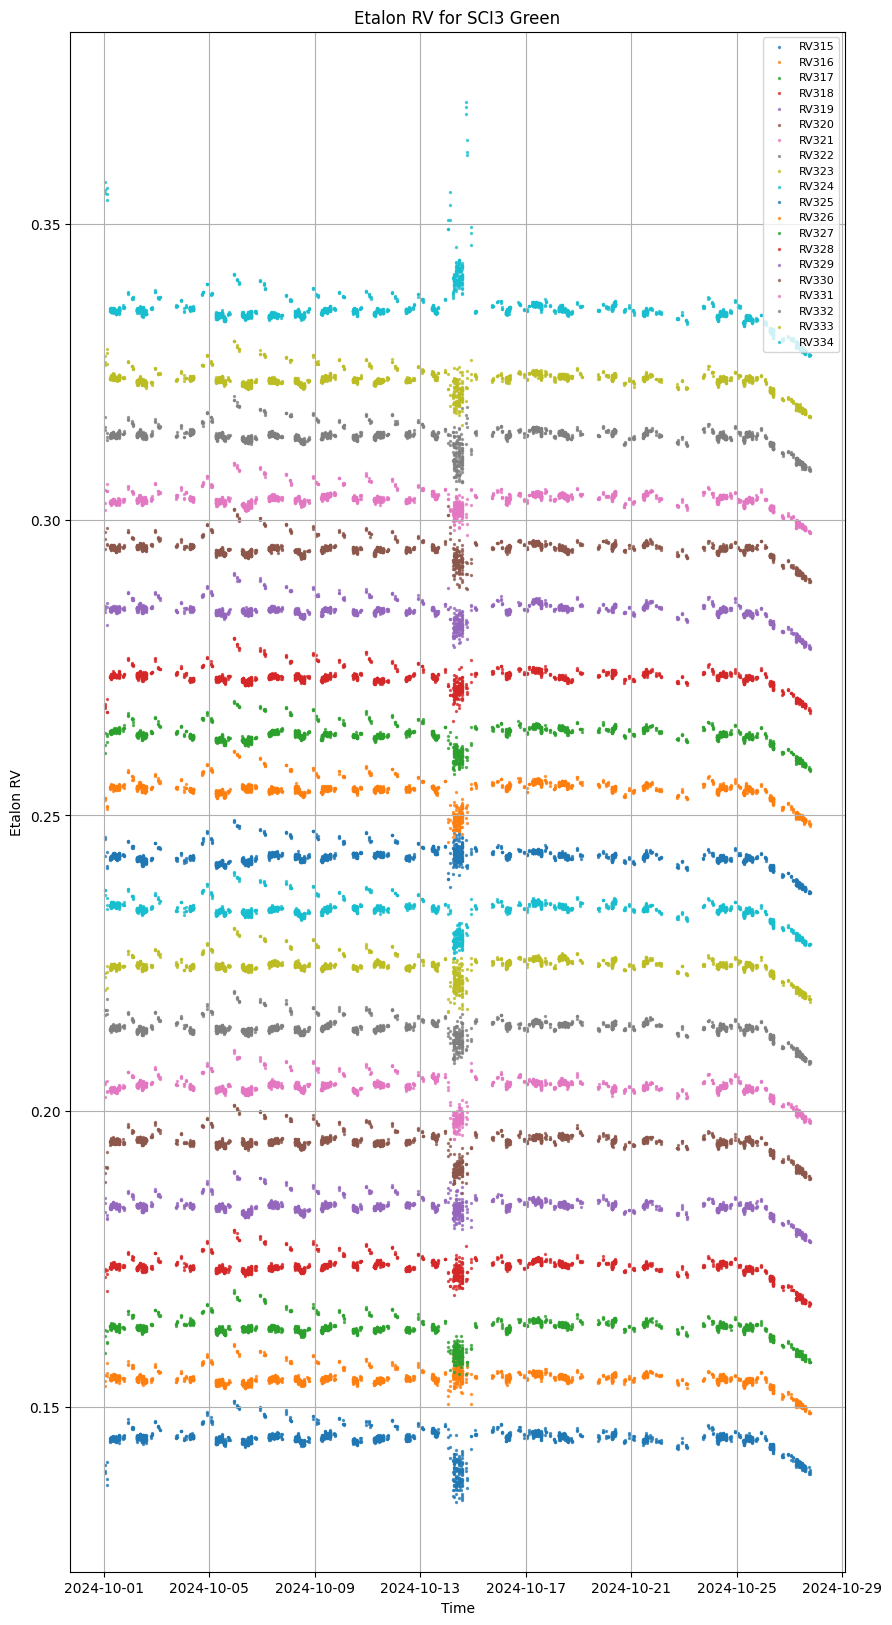

In [26]:
plt.figure(figsize=(10, 20)) 
for i in range(35):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_3_green_df[weight_col] != 0
    times = sci_3_green_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_3_green_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI3 Green")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [27]:
rms_results = []
for i in range(35):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_3_green_df.loc[sci_3_green_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([i, rv_col, rms])

sci_3_green_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_3_green_overall_rms = np.min(sci_3_green_rms_df["RMS"])
sci_3_green_rms_df["RMS Factor"] = (sci_3_green_rms_df["RMS"] - sci_3_green_overall_rms)/sci_3_green_overall_rms + 1
sci_3_green_rms_df["RMS Rank"] = rank_array(sci_3_green_rms_df["RMS"] - sci_3_green_overall_rms)
sci_3_green_rms_df

,Order,RV Col,RMS,RMS Factor,RMS Rank
0,15,RV315,0.005986,1.116917,7
1,16,RV316,0.005561,1.037653,2
2,17,RV317,0.007128,1.330024,19
3,18,RV318,0.006681,1.246550,14
4,19,RV319,0.006447,1.202858,11
5,20,RV320,0.005771,1.076847,4
6,21,RV321,0.006520,1.216551,13
7,22,RV322,0.006291,1.173727,10
8,23,RV323,0.005773,1.077188,5
9,24,RV324,0.006507,1.214025,12


In [28]:
sci_3_green_max_order = sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmax(), "Order"]
sci_3_green_min_order = sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_3_green_max_order}')
print(f'Min: {sci_3_green_min_order}')

Max: 25
Min: 30


# Etalon RV for the SCI3 Fiber Red Wavelengths

In [29]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (335, 367):
    unique_cols.add(f'RV{i}')
for i in range(35, 67):
    unique_cols.add(f'CCFW{i}')

In [30]:
sci_3_red_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_3_red_df = sci_3_red_df.drop(columns=['NOTJUNK'])
sci_3_red_df = sci_3_red_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_3_red_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_3_red_df.iloc[:, 2:] = sci_3_red_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_3_red_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_3_red_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_3_red_df = pd.concat([sci_3_red_df['DATE-MID'], sci_3_red_df['ObsID'],sci_3_red_df[rv_columns], sci_3_red_df[ccfw_columns]], axis=1)
sci_3_red_df['DATE-MID'] = pd.to_datetime(sci_3_red_df['DATE-MID'])
sci_3_red_df

,DATE-MID,ObsID,RV335,RV336,RV337,RV338,RV339,RV340,RV341,RV342,...,CCFW57,CCFW58,CCFW59,CCFW60,CCFW61,CCFW62,CCFW63,CCFW64,CCFW65,CCFW66
0,2024-10-01 01:31:52.415,KP.20241001.05482.41,0.0,-0.005556,-0.012494,-0.007983,-0.007688,-0.007643,-0.008307,-0.008017,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2024-10-01 01:33:40.948,KP.20241001.05590.94,0.0,-0.003987,-0.003947,-0.006387,-0.009319,-0.009816,-0.006828,-0.006794,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2024-10-01 01:35:29.660,KP.20241001.05699.65,0.0,-0.003145,-0.007722,-0.005701,-0.008732,-0.009499,-0.008704,-0.010374,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2024-10-01 02:52:11.874,KP.20241001.10301.86,0.0,-0.005567,-0.00677,-0.012484,-0.007678,-0.009442,-0.009822,-0.006814,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2024-10-01 02:54:00.323,KP.20241001.10410.31,0.0,-0.006784,-0.012286,-0.008095,-0.007499,-0.009388,-0.007605,-0.008099,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,2024-10-27 17:33:32.853,KP.20241027.63182.84,0.0,-0.010016,-0.010887,-0.011343,-0.012185,-0.010887,-0.010731,-0.011399,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2558,2024-10-27 17:35:21.291,KP.20241027.63291.25,0.0,-0.010315,-0.011231,-0.011329,-0.011774,-0.010311,-0.010941,-0.01121,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2559,2024-10-27 18:31:40.930,KP.20241027.66670.90,0.0,-0.010576,-0.011609,-0.011427,-0.012277,-0.011129,-0.011334,-0.01121,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2560,2024-10-27 18:33:29.617,KP.20241027.66779.59,0.0,-0.010345,-0.0112,-0.011277,-0.012456,-0.011558,-0.01109,-0.011741,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


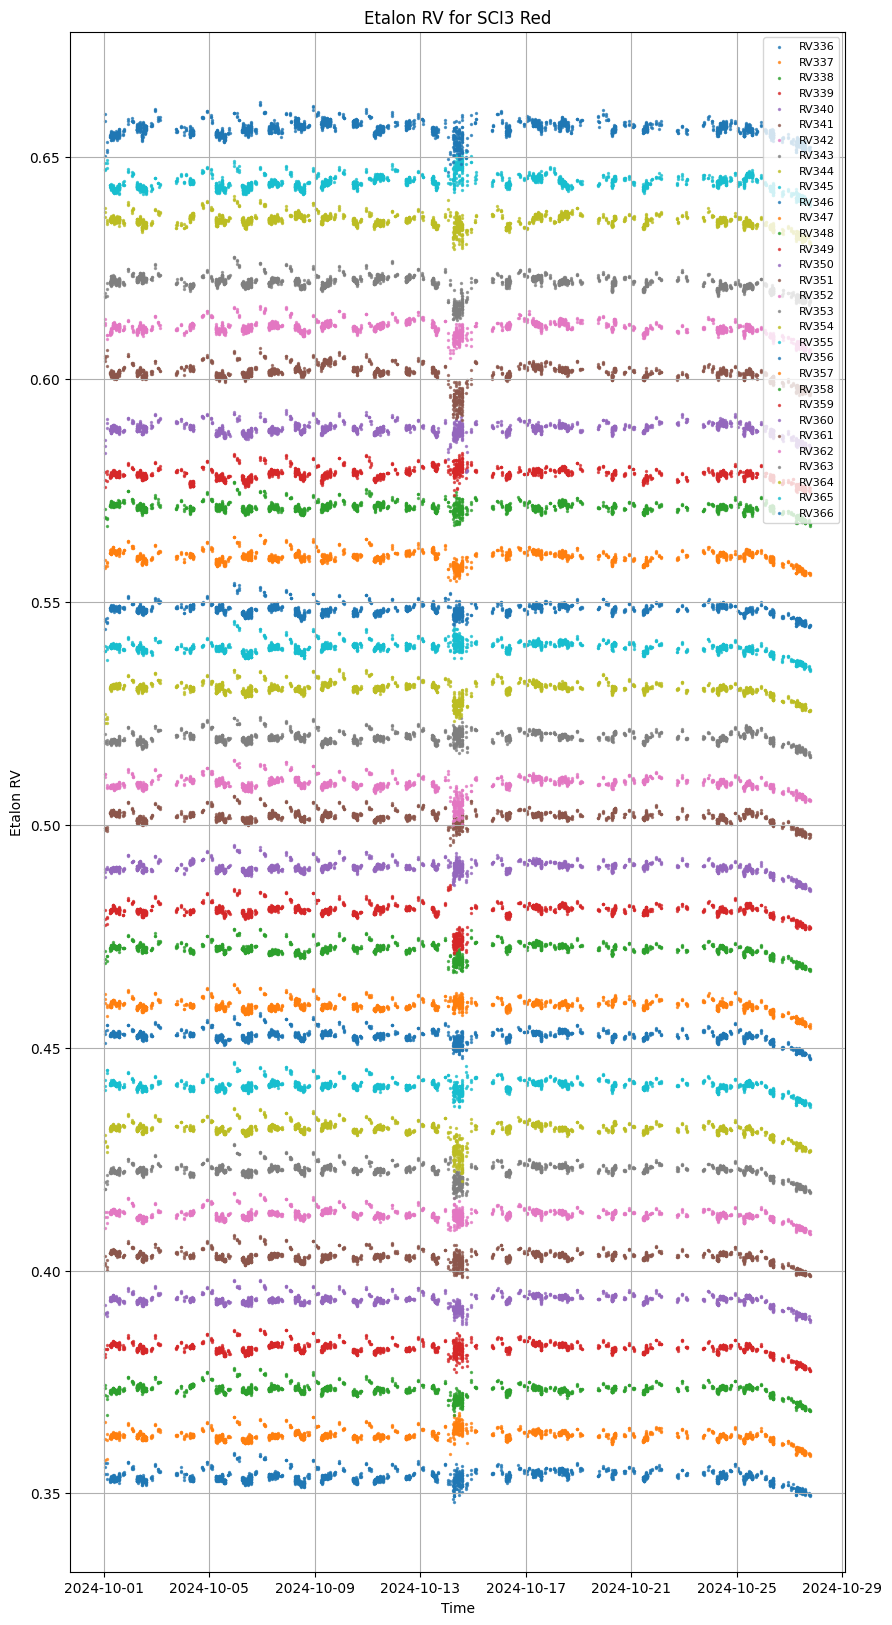

In [31]:
plt.figure(figsize=(10, 20)) 
for i in range(35, 67):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_3_red_df[weight_col] != 0
    times = sci_3_red_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_3_red_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI3 Red")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [32]:
rms_results = []
order = 0
for i in range(35, 67):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_3_red_df.loc[sci_3_red_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([order, rv_col, rms])
    order+=1

sci_3_red_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_3_red_overall_rms = np.min(sci_3_red_rms_df["RMS"])
sci_3_red_rms_df["RMS Factor"] = (sci_3_red_rms_df["RMS"] - sci_3_red_overall_rms)/sci_3_red_overall_rms + 1
sci_3_red_rms_df["RMS Rank"] = rank_array(sci_3_red_rms_df["RMS"] - sci_3_red_overall_rms)
sci_3_red_rms_df

,Order,RV Col,RMS,RMS Factor,RMS Rank
0,1,RV336,0.006563,1.532827,4
1,2,RV337,0.007247,1.692552,8
2,3,RV338,0.007009,1.636988,6
3,4,RV339,0.007654,1.787666,10
4,5,RV340,0.006870,1.604483,5
5,6,RV341,0.007117,1.662120,7
6,7,RV342,0.007656,1.788065,11
7,8,RV343,0.007784,1.817987,12
8,9,RV344,0.008770,2.048257,17
9,10,RV345,0.008765,2.047216,16


In [33]:
sci_3_red_max_order = sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmax(), "Order"]
sci_3_red_min_order = sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_3_red_max_order}')
print(f'Min: {sci_3_red_min_order}')

Max: 21
Min: 31


# Overall Results

In [34]:
dict_rms = {'SCI Fiber': ['Green SCI1', 'Green SCI2', 'Green SCI3', 'Red SCI1', 'Red SCI2', 'Red SCI3'], 
            'Max Order': [sci_1_green_max_order, sci_2_green_max_order, sci_3_green_max_order, sci_1_red_max_order, sci_2_red_max_order, sci_3_red_max_order],
            'Min Order': [sci_1_green_min_order, sci_2_green_min_order, sci_3_green_min_order, sci_1_red_min_order, sci_2_red_min_order, sci_3_red_min_order],
            'Max RMS(km/s rms)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmax(), "RMS"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmax(), "RMS"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmax(), "RMS"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmax(), "RMS"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmax(), "RMS"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmax(), "RMS"]],
            'Max Deviation(km/s rms + 1)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmax(), "RMS Factor"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmax(), "RMS Factor"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmax(), "RMS Factor"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmax(), "RMS Factor"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmax(), "RMS Factor"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmax(), "RMS Factor"]],
            'Min RMS(km/s rms)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmin(), "RMS"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmin(), "RMS"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmin(), "RMS"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmin(), "RMS"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmin(), "RMS"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmin(), "RMS"]],
            'Min Deviation(km/s rms + 1)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmin(), "RMS Factor"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmin(), "RMS Factor"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmin(), "RMS Factor"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmin(), "RMS Factor"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmin(), "RMS Factor"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmin(), "RMS Factor"]]}
rms_overall = pd.DataFrame.from_dict(dict_rms)
rms_overall

,SCI Fiber,Max Order,Min Order,Max RMS(km/s rms),Max Deviation(km/s rms + 1),Min RMS(km/s rms),Min Deviation(km/s rms + 1)
0,Green SCI1,34,16,0.003477,2.032442,0.001711,1.0
1,Green SCI2,21,16,0.003454,1.528524,0.002260,1.0
2,Green SCI3,25,30,0.007339,1.369381,0.005360,1.0
3,Red SCI1,31,21,0.008373,6.033667,0.001388,1.0
4,Red SCI2,22,29,0.003813,2.871218,0.001328,1.0
5,Red SCI3,21,31,0.011830,2.762873,0.004282,1.0


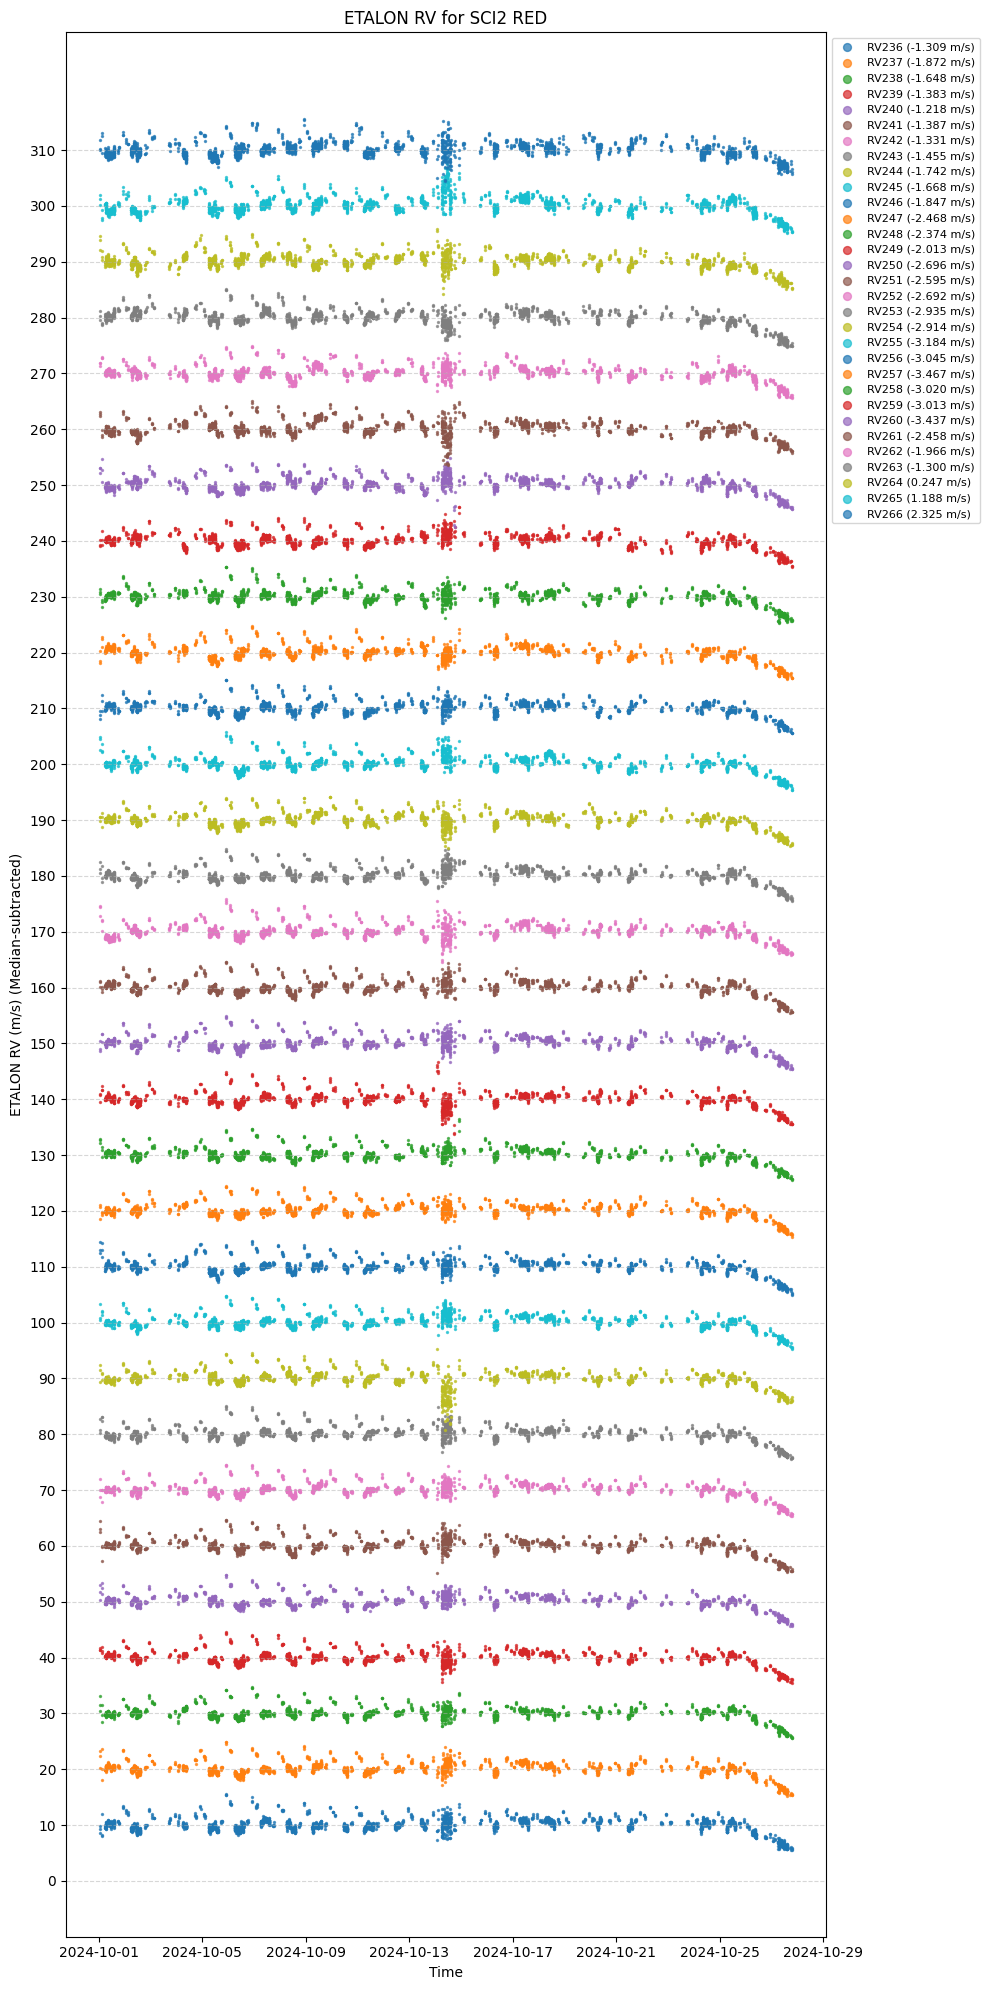

In [35]:
myTS.plot_rv_per_fiber_wavelength('etalon', 'red', 'SCI2', start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), object_like=['etalon'], show_plot=True)